<a href="https://colab.research.google.com/github/dadashzadeh/persian-spell-checker/blob/main/one_spell_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# نمونه ساده اولیه

In [ ]:
# نمونه اول  ساده غلط املایی با استفاده از جایگزین کردن

def replace_keyword(word: str, dic: dict = {"سسلامم": "سلام", "سسلام": "سلام"}) -> str:
    '''
    جمله و لیست کلمات غلط و درست را به صورت دیکشنری وارد کنید
    ### نمونه پیش فرض:
    {"خوردنن": "خوردن", "امد": "آمد"}

    '''

    # دیشکنری تبدل به یک ایتم شده و از ایتم نام و مقدار آن درون یک اسم ریخته میشود
    for name, value in dic.items():

        # نام با مقدار جایگزین میشود
        word = word.replace(name, value)

    return word


replace_keyword("سسلام" , {"سسلامم": "سلام", "سسلام": "سلام", "سسام": "سلام", "سسلم": "سلام"})


'سلام'

# نمونه دوم


**پیدا کردن کلمه توسط الگوریتم فاصله همینگ (شباهت)**




101100 # تعداد 6

111000 # تعداد مقایسه ها 2 | تعداد مشابه ها 4

2/6 = 0.33

4/6 = 0.66

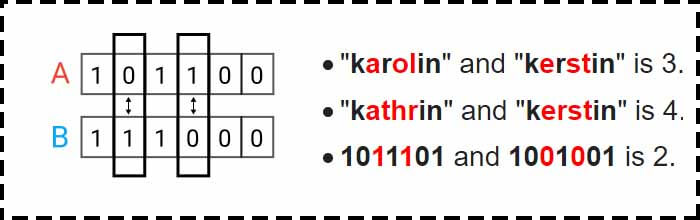

In [ ]:
!pip install textdistance  # نصب ماژول

## Supported libraries:

# abydos
# Distance
# jellyfish
# py_stringmatching
# pylev
# python-Levenshtein
# pyxDamerauLevenshtein

## Algorithms:

# DamerauLevenshtein
# Hamming
# Jaro
# JaroWinkler
# Levenshtein


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import textdistance

# مقایسه
print(textdistance.hamming.normalized_distance('11111', '11111'))

print("--------------------")

#شباهت
print(textdistance.hamming.normalized_similarity('11111', '11111'))

0.0
--------------------
1.0


In [ ]:
# ماژول مقایسه متن ها با استفاده از 30 الگوریتم
import textdistance


def find_similarity_hamming(word: str) -> tuple:
    '''
    ### پیدا کردن کلمه با استفاده از الگوریتم شباهت همینگ
  
    '''

    with open("./The_right_words.txt", encoding="utf8") as txt_file:
        datafile = txt_file.read()
        datafile = datafile.splitlines()

    list_number_hamming = []
    keyword = []

    for data in datafile:
        te = textdistance.hamming.normalized_similarity(word, data)
        if te > 0.70:
            list_number_hamming.append(te)
            keyword.append(data)

    di = dict(zip(keyword, list_number_hamming))
    a = sorted(di.items(), key=lambda x: x[1], reverse=True)
    
    if not a:
        return None
    else:
        return a[0]

In [ ]:
text = "بستنیی که از مغازه خویده ایم گلون استت"

text_split = text.split()

with open("./The_right_words.txt", encoding="utf8") as txt_file:
    datafile = txt_file.read()
    datafile = datafile.splitlines()
    
word_list = [word for word in text_split if word not in datafile]

for bad_keyword in word_list:
    text = text.replace(bad_keyword, find_similarity_hamming(bad_keyword)[0])

print(text)


بستنی که از مغازه خریده ایم کلون است


# نمونه سوم

In [ ]:
import re
import math
import string
import random
from collections import Counter

In [ ]:
with open("/content/The_right_words.txt" , encoding='utf-8') as f:
    text = f.read()
len(text)

40836

In [ ]:
def tokens(text):
    "List all the word tokens (consecutive letters) in a text. Normalize to lowercase."
    return re.findall('[ا-ی]+', text.lower())

In [ ]:
tokens('سلام من هستم محمد و بستنی دوست دارم')

['سلام', 'من', 'هستم', 'محمد', 'و', 'بستنی', 'دوست', 'دارم']

In [ ]:
words = tokens(text) # جدا کردن کلمات از متن با استفاده از رجکس
len(words) # تعداد کلمات

7246

In [ ]:
print(words[:10]) # 10 تا نمونه از کلمات

['ب', 'با', 'باد', 'بان', 'برو', 'برومندی', 'بروی', 'بستن', 'بستنی', 'بسولومان']


In [ ]:
def sample(bag : str, n=10) -> str:
    "Sample a random n-word sentence from the model described by the bag of words."
    return ' '.join(random.choice(bag) for _ in range(n))

In [ ]:
sample(words) # نمونه گیری رندوم از 10 کلمه

'خدمه ن مش هدایت اخلاق تخم لرزید ادت بشکن لی'

In [ ]:
COUNTS = Counter(words)
print(COUNTS)
print("-----------")
#  یک عدد رو از شما میگیره و به تعداد اون عدد به شما بیشترین آیتم های تکرار شده رو برمیگردونه
print(COUNTS.most_common(10))

Counter({'در': 11, 'بر': 6, 'مد': 5, 'ید': 5, 'مده': 4, 'ن': 4, 'ورده': 4, 'ورد': 3, 'ی': 3, 'نمی': 3, 'با': 2, 'باد': 2, 'بان': 2, 'برو': 2, 'برومندی': 2, 'بروی': 2, 'بستن': 2, 'بستنی': 2, 'بش': 2, 'بی': 2, 'تش': 2, 'تی': 2, 'جر': 2, 'خر': 2, 'خون': 2, 'دم': 2, 'ر': 2, 'راس': 2, 'رد': 2, 'ردی': 2, 'ری': 2, 'زاد': 2, 'زار': 2, 'شتی': 2, 'شغال': 2, 'فری': 2, 'فرین': 2, 'قایی': 2, 'لا': 2, 'لات': 2, 'لت': 2, 'لود': 2, 'م': 2, 'مال': 2, 'میز': 2, 'نان': 2, 'نج': 2, 'نس': 2, 'نط': 2, 'نه': 2, 'نک': 2, 'نگاه': 2, 'نی': 2, 'هار': 2, 'هس': 2, 'هن': 2, 'هی': 2, 'وردم': 2, 'وردن': 2, 'وردند': 2, 'وردیم': 2, 'وری': 2, 'کله': 2, 'گاه': 2, 'یا': 2, 'یه': 2, 'از': 2, 'بار': 2, 'ور': 2, 'ورم': 2, 'یی': 2, 'درمی': 2, 'رای': 2, 'سر': 2, 'غاز': 2, 'سو': 2, 'صد': 2, 'قر': 2, 'مجلس': 2, 'می': 2, 'ب': 1, 'بسولومان': 1, 'بنکشیدهای': 1, 'بپاش': 1, 'بک': 1, 'تشش': 1, 'تشه': 1, 'تشی': 1, 'تشین': 1, 'ث': 1, 'ثار': 1, 'جیده': 1, 'جیل': 1, 'جینم': 1, 'خ': 1, 'خرالزمان': 1, 'خرش': 1, 'خرین': 1, 'خوند': 1, 'خوندها

In [ ]:
def correct(word):
    "Find the best spelling correction for this word."
    # Prefer edit distance 0, then 1, then 2; otherwise default to word itself.
    candidates = (known(edits0(word)) or 
                  known(edits1(word)) or 
                  known(edits2(word)) or 
                  [word])
    return max(candidates, key=COUNTS.get)

Now for `edits1(word)`: the set of candidate words that are one edit away. For example, given `"wird"`, this would include `"weird"` (inserting an `e`) and `"word"` (replacing a `i` with a `o`), and also `"iwrd"` (transposing `w` and `i`; then `known` can be used to filter this out of the set of final candidates). How could we get them?  One way is to *split* the original word in all possible places, each split forming a *pair* of words, `(a, b)`, before and after the place, and at each place, either delete, transpose, replace, or insert a letter:

<table>
  <tr><td> pairs: <td><tt> Ø+wird <td><tt> w+ird <td><tt> wi+rd <td><tt>wir+d<td><tt>wird+Ø<td><i>Notes:</i><tt> (<i>a</i>, <i>b</i>)</tt> pair</i>
  <tr><td> deletions: <td><tt>Ø+ird<td><tt> w+rd<td><tt> wi+d<td><tt> wir+Ø<td><td><i>Delete first char of b</i>
  <tr><td> transpositions: <td><tt>Ø+iwrd<td><tt> w+rid<td><tt> wi+dr</tt><td><td><td><i>Swap first two chars of b
  <tr><td> replacements: <td><tt>Ø+?ird<td><tt> w+?rd<td><tt> wi+?d<td><tt> wir+?</tt><td><td><i>Replace char at start of b
  <tr><td> insertions: <td><tt>Ø+?+wird<td><tt> w+?+ird<td><tt> wi+?+rd<td><tt> wir+?+d<td><tt> wird+?+Ø</tt><td><i>Insert char between a and b
</table>

In [ ]:
def known(words):
    "Return the subset of words that are actually in the dictionary."
    return {w for w in words if w in COUNTS}

def edits0(word): 
    "Return all strings that are zero edits away from word (i.e., just word itself)."
    return {word}

def edits2(word):
    "Return all strings that are two edits away from this word."
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

In [ ]:
def edits1(word):
    "Return all strings that are one edit away from this word."
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

def splits(word):
    "Return a list of all possible (first, rest) pairs that comprise word."
    return [(word[:i], word[i:]) 
            for i in range(len(word)+1)]

alphabet = 'آابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهی'

In [ ]:
def correct_text(text):
    "Correct all the words within a text, returning the corrected text."
    return re.sub('[ا-ی]+', correct_match, text)

def correct_match(match):
    "Spell-correct word in match, and preserve proper upper/lower/title case."
    word = match.group()
    return case_of(word)(correct(word.lower()))

def case_of(text):
    "Return the case-function appropriate for text: upper, lower, title, or just str."
    return (str.upper if text.isupper() else
            str.lower if text.islower() else
            str.title if text.istitle() else
            str)

In [ ]:
correct_text('بستنیی که از پغازه خویده ایم گلون استت')

'بستنی که از مغازه خورده ایم کلون است'